<a href="https://colab.research.google.com/github/Wolfinmoon/telecomX_pt-2/blob/main/TelecomX_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregamento e Limpeza

In [2]:
try:
    df = pd.read_csv('TelecomX_Dataset_Transformado.csv')
    print("Arquivo carregado com sucesso!")

    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    if 'customerID' in df.columns:
        df.drop('customerID', axis=1, inplace=True)

    print("Colunas de ID removidas. Visualizando os dados:")
    display(df.head())

except FileNotFoundError:
    print("ERRO: O arquivo 'TelecomX_Dataset_Transformado.csv' não foi encontrado.")

Arquivo carregado com sucesso!
Colunas de ID removidas. Visualizando os dados:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Análise da Proporção de Evasão (Churn)

Proporção de Churn no dataset (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-3-2858939989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['#4CAF50', '#F44336'])


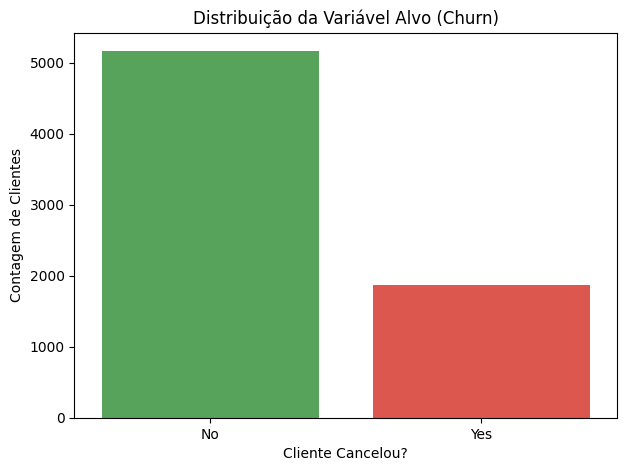

In [3]:
print("Proporção de Churn no dataset (%):")
print(df['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', palette=['#4CAF50', '#F44336'])
plt.title('Distribuição da Variável Alvo (Churn)')
plt.xlabel('Cliente Cancelou?')
plt.ylabel('Contagem de Clientes')
plt.show()

##Preparação dos Dados para Modelagem (Encoding)


In [5]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('Churn', axis=1)
y_text = df['Churn']

le = LabelEncoder()
y = le.fit_transform(y_text)

X_encoded = pd.get_dummies(X, drop_first=True)

print("Shape original de X:", X.shape)
print("Shape de X após o One-Hot Encoding:", X_encoded.shape)
print("\nExemplo das features codificadas:")
display(X_encoded.head())

Shape original de X: (7032, 20)
Shape de X após o One-Hot Encoding: (7032, 31)

Exemplo das features codificadas:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


##Divisão e Padronização

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dados divididos em treino ({X_train.shape[0]} amostras) e teste ({X_test.shape[0]} amostras).")

colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
colunas_numericas.remove('customer.SeniorCitizen')

scaler = StandardScaler()


X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

print("\nFeatures numéricas padronizadas com sucesso!")
print("Exemplo de alguns dados de treino após a padronização:")
display(X_train.head())

Dados divididos em treino (5625 amostras) e teste (1407 amostras).

Features numéricas padronizadas com sucesso!
Exemplo de alguns dados de treino após a padronização:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
1416,0,0.184279,-1.479254,-0.698974,-1.479254,True,True,False,True,False,...,True,False,True,False,False,False,False,False,False,False
6993,0,1.443383,1.155008,1.923342,1.155008,True,True,True,True,False,...,False,True,False,True,False,True,True,False,True,False
3417,1,-1.196675,0.300203,-0.919135,0.300203,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4559,0,-0.952977,0.137225,-0.744566,0.137225,True,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True
3604,0,0.955988,0.012497,0.537220,0.012497,False,True,True,True,False,...,False,True,False,False,True,False,False,False,False,False
